## Numerical integration: Initial value problems
The equation of motion of particles in the n-body problem can be written as:

$$\ddot{\mathbf{r}}_j = \mathbf{f}_j\left(\mathbf{r}_j,\dot{\mathbf{r}}_j, t\right)$$

In Newtonian gravity, there is no $\dot{\mathbf{r}}_j$ or $t$ dependence on $\ddot{\mathbf{r}}$ (though $\ddot{\mathbf{r}}$ *does* depend on $\dot{\mathbf{r}}$ in relativistic gravity), and therefore:

$$\ddot{\mathbf{r}}_j = \mathbf{f}_j\left(\mathbf{r}_j\right)$$

Specifically:

$$\ddot{\mathbf{r}}_j = \mu\sum_{i=1, i\neq j}^n \frac{\mathbf{r}_i - \mathbf{r}_j}{\left|\mathbf{r}_i - \mathbf{r}_j\right|^3}$$

This is a set of $3n$ coupled 2$^{nd}$ order ordinary differential equations (ODEs). However, we can define the variable $\mathbf{v} = \dot{\mathbf{r}}$ and therefore:

$$
\begin{aligned}
\mathbf{v}_j &= \dot{\mathbf{r}}\\
\dot{\mathbf{v}}_j &= \mathbf{f}_j\left(\mathbf{r}_j\right)
\end{aligned}
$$

This is now a set of $6n$ coupled 1$^{st}$ order ODEs. Given a set of *initial conditions*, which are the set of $\left\{\mathbf{r}_j,\mathbf{v}_j\right\}$ values at time $t=0$, we would like to know the values of these $6n$ quantities at any other time. Because there is no general closed-form solution to the n-body problem for $n>2$, we must compute these quantities numerically to some accuracy by *numerical integration*.

### Euler's method

One of the simplest ways numerical integrate a set of ODEs is by using *Euler's method*. 

Let $h=\Delta t$, which is called the *step size* or sometimes *time step*. Let's define a 1$^{st}$ order ODE of the form:

$$\dot{y} = f\left(y,t\right)$$

The idea behind Euler's method is to estimate the value of $y$ at some future time $t$ from a line that is tangent to the value of $y$ at time $t=0$ ($y_0$). Unless your function is a line, this will not be correct, of course, however if you take a sufficiently small step size, then this should get you close!  

To express this mathematically, let's define a series of time values at fixed intervals, $t_0, t_1, \ldots , t_K$. Euler's method says that:

$y_{k+1} = y_k + h f\left(y_k,t\right) + \mathcal{O}\left(h^2\right)$

The term $\mathcal{O}\left(h^2\right)$ indicates that the error between the true value of the function and the numerical estimate is of the same order as $h^2$.

#### Harmonic oscillator
Let's examine Euler's method in action on a problem for which we actually have a closed-form analytical solution to compare with. Consider a simple harmonic oscillator of the form:

$$\ddot{x}+\omega^2 x = 0$$

This is a 2$^{nd}$ order ODE, but like the n-body problem, we can write this as a pair of 1$^{st}$ order ODEs with a simple variable subsitution of $y=\dot{x}$. We now have:

$$
\begin{aligned}
\dot{x} &= y\\
\dot{y} &= -\omega^2 x
\end{aligned}
$$

This set of equations has an exact analytical solution:

$$
\begin{aligned}
x &= A\cos\left(\omega t+\phi\right)\\
y &= -A\omega\sin\left(\omega t+\phi\right)
\end{aligned}
$$

where $A$ and $\phi$ are constants that are determined by the initial conditions, $\left(x_0,y_0\right)$. Suppose we take $\omega = 1$ time units and choose initial values of $x_0 = 1$ and $y_0 = 0$. This gives $A=1$ and $\phi=0$. Time history of our two variables can be plotted over 2$\pi$ time units:

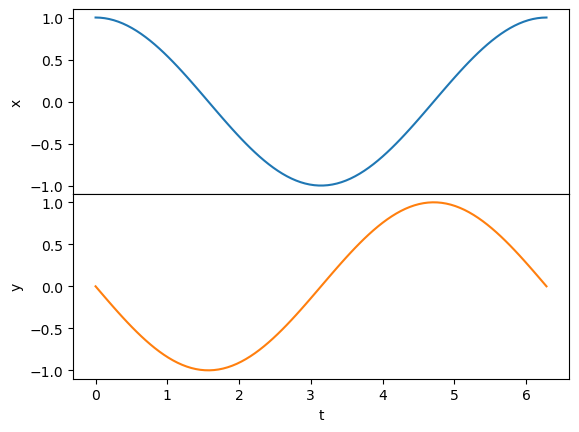

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
figsize = 8

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=.0)

col = plt.rcParams['axes.prop_cycle'].by_key()['color']
omega = 1
A = 1.0
phi = 0.0

N=100

t = np.linspace(start=0, stop=2*np.pi, num=N)
x = A * np.cos(omega * t + phi)
y = -A * omega * np.sin(omega * t + phi)

ax2.set_xlabel("t")
ax1.set_ylabel("x")
ax2.set_ylabel("y")
ax1.plot(t,x,label="x",color=col[0])
ax2.plot(t,y,label="y",color=col[1])
plt.show();

If instead we plot $x$ and $y$ together, we get:

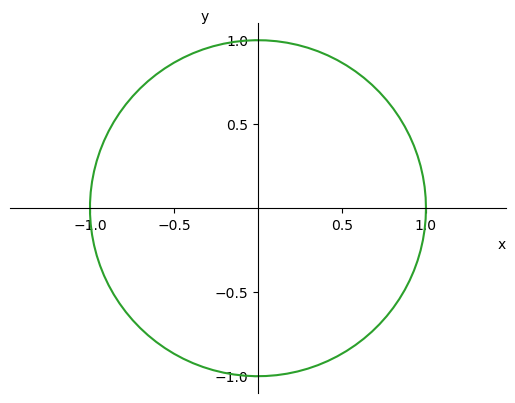

In [2]:
fig, ax = plt.subplots(1)
ax.axis('equal')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel("x",loc="right")
ax.set_ylabel("y",loc="top",rotation=0)
ax.plot(x,y,color=col[2])
ax.set_xticks([-1.0, -0.5, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.5, 1.0])
plt.show();

Now let's try Euler's method on this problem. The discretized system of equations is given by:

$$
\begin{aligned}
x_{k+1} &= x_k + h y_k\\
y_{k+1} &= y_k -h\omega^2 x_k
\end{aligned}
$$

Suppose we choose $h=2\pi/100$. We can plot our numerical solution along side out true analytical solution as above.

In [3]:
h = t[-1]/t.size
xE = np.empty_like(x)
yE = np.empty_like(y)
xE[0] = x[0]
yE[0] = y[0]
for k,tk in enumerate(t[:-1]):
    xE[k+1] = xE[k] + h * yE[k]
    yE[k+1] = yE[k] - h * omega**2 * xE[k]

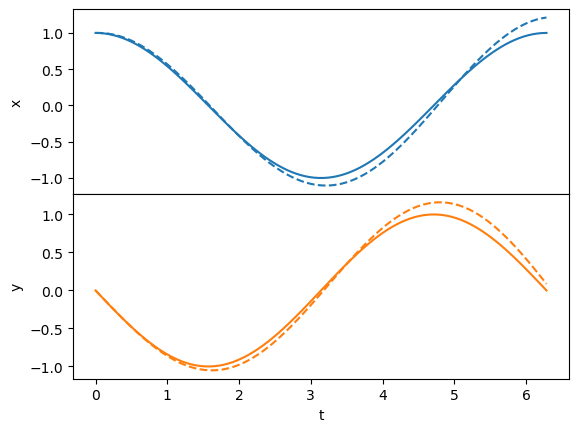

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=.0)

col = plt.rcParams['axes.prop_cycle'].by_key()['color']
omega = 1
A = 1.0
phi = 0.0

t = np.linspace(start=0, stop=2*np.pi, num=N)
x = A * np.cos(omega * t + phi)
y = -A * omega * np.sin(omega * t + phi)

ax2.set_xlabel("t")
ax1.set_ylabel("x")
ax2.set_ylabel("y")
ax1.plot(t,x,color=col[0])
ax1.plot(t,xE,color=col[0],linestyle="--")
ax2.plot(t,y,color=col[1])
ax2.plot(t,yE,color=col[1],linestyle="--")
plt.show();

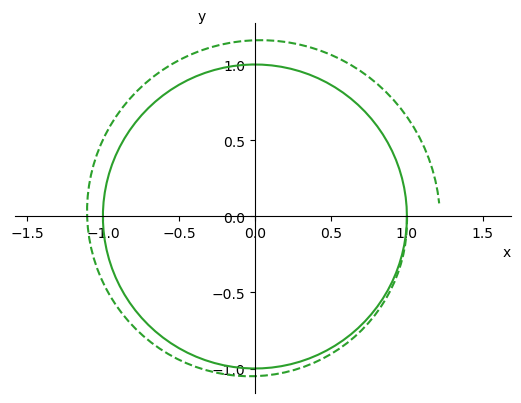

In [5]:
fig, ax = plt.subplots(1)
ax.axis('equal')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel("x",loc="right")
ax.set_ylabel("y",loc="top",rotation=0)
ax.plot(x,y,color=col[2])
ax.plot(xE,yE,color=col[2],linestyle="--")
plt.show();

That does not look good. Our numerical solution is spiraling away from the true solution! 


What is happening? In order to understand the behavior of this system, we have to understand what happens if there are errors in the computation. Errors are unavoidable when dealing with floating point numbers on computers, because computers cannot represent floating point numbers to infinite precision, and therefore these numbers are truncated.

#### Error analysis 

First, let's write it in matrix form:

$$
\begin{bmatrix}
x_{k+1} \\
y_{k+1}
\end{bmatrix} 
=
\begin{bmatrix}
1 & h\\
-h\omega^2 & 1
\end{bmatrix}
\begin{bmatrix}
x_k\\
y_k
\end{bmatrix}
$$

Now suppose there is error in our discretization, such as numerical round-off error. Error is simply the difference between the numerical representation and the exact analytical equation. Computers represent *approximations* of non-whole numbers, and therefore there is *always* error due to truncation.

$$\delta x_k =x_{k,true}-x_{k,num}$$

We can use the discretized equation to understand how error propogate through our system over time by analyzing the behavior of the following system of equations:

$$
\begin{bmatrix}
\delta x_{k+1} \\
\delta y_{k+1}
\end{bmatrix} 
=
\begin{bmatrix}
1 & h\\
-h\omega^2 & 1
\end{bmatrix}
\begin{bmatrix}
\delta x_k\\
\delta y_k
\end{bmatrix}
$$

Suppose we have a linear equation of the form

$${z'}_{k+1}=M z_k$$

This is a linear ODE that has a solution (in discretized form) of:

$$z_k = z_0 e^{M}t$$

where $M$ is a complex number. If $M$ is purely imaginary, then the solution is bounded with time. However, if it has a real part, the solution increases unbounded with time. For our system of equations, instead of a single number $M$ we have a matrix:

$$
\mathbf{M}
=
\begin{bmatrix}
1 & h\\
-h\omega^2 & 1
\end{bmatrix}
$$

The idea is the same, except we use the eigenvalues of $\mathbf{M}$ to determine whether or not the solution is bounded or unbounded with time. The eigenvalues are defined as any scalar constant, $\lambda$, that satisfies the equation:

$$\mathbf{M}\mathbf{z}=\lambda\mathbf{x}$$

As long as $\mathbf{z} \neq 0$, they can be found via:

$$\left|\mathbf{M}-\lambda\mathbf{I}\right| = 0$$

For our equation, therefore, we have:

$$
\begin{aligned}
\left|\mathbf{M}-\lambda\mathbf{I}\right| &= 0\\
\begin{vmatrix}
1 & h\\
-h\omega^2 & 1
\end{vmatrix}
&=0\\
\left(1-\lambda\right)^2 + h^2\omega^2 &= 0\\
\left(1-\lambda\right)^2 &= -h^2\omega^2\\
1-\lambda &= \pm i h \omega\\
\lambda_{\pm} &= 1 \pm ih\omega\\
\end{aligned}
$$

The related eigenvectors satisfy the equation:

$$\left(\mathbf{M}-\lambda\mathbf{I}\right)\mathbf{v} = \mathbf{0}$$

For this problem, these are:

$$
\mathbf{v}_{\pm} =
\begin{bmatrix}
1\\
\pm i\omega\\
\end{bmatrix}
$$


The solution to the equation can be written as:

$$
\begin{aligned}
\begin{bmatrix}
x_k\\
y_k\\
\end{bmatrix}
&= A_k e^{\lambda_+ t}\mathbf{v}_+ + B_k e^{\lambda_- t}\mathbf{v}_-\\
&= a_k\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + b_k\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}\\
\end{aligned}
$$

Let's start with some initial condition where $\left(x_0,y_0\right)=\left(a_0,b_0\right)$.

$$\begin{bmatrix}{ x_0\\ y_0} \end{bmatrix} = a_0\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + b_0\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}$$

In the next iteration, we have:

$$
\begin{aligned}
\begin{bmatrix}{ x_1\\ y_1}\end{bmatrix} &= \begin{bmatrix}1 & h\\ -h\omega^2 & 1\end{bmatrix}  \begin{bmatrix}{x_0\\ y_0}\end{bmatrix}\\
&=a_0\left(1 + ih\omega\right)\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + b_0\left(1 - ih\omega\right)\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}
\end{aligned}
$$

The $k^{th}$ iteration is:

$$\begin{bmatrix}{ x_k\\ y_k}\end{bmatrix} = a_0\left(1 + ih\omega\right)^k\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + b_0\left(1 - ih\omega\right)^k\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}$$

Let $1\pm i\omega h = e^{\pm i\theta}\sqrt{1 + \omega^2h^2}$, where $\tan\theta = \omega h$, which is just the polar form of the complex number. For small step size $\omega h << 1$, and $\tan\theta\approx\theta\approx\omega h$

Taylor series (and remember that $t=k h$):

$$
\begin{aligned}
\left(1\pm i\omega h\right)^k &=\left[\sqrt{1+\omega^2 h^2} e^{\pm i\theta}\right]^k\\
&=\left(1+\omega^2 h^2\right)^{k/2}e^{\pm i\theta k}\\
&\simeq \left(1+\frac{1}{2}\omega^2 h^2k\right)e^{\pm i\omega t}
\end{aligned}
$$

The general solution is therefore:
$$\begin{bmatrix}{ x_k\\ y_k}\end{bmatrix} = a_0\left(1+\frac{1}{2}\omega^2 h^2k\right)e^{+i\omega t}\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + b_0\left(1+\frac{1}{2}\omega^2 h^2k\right)e^{- i\omega t}\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}$$

Let's see what happens when we input our initial conditions from before: $x_0 = 1$ and $y_0 = 0$. First we need to solve for $a_0$ and $b_0$ from the initial conditions.

$$\begin{bmatrix}{ x_0\\ y_0} \end{bmatrix}=\begin{bmatrix}{ 1\\ 0} \end{bmatrix} = a_0\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + b_0\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}$$

$$
\begin{aligned}
1 &= a_0 + b_0\\
0 &= a_0 i \omega - b_0 i \omega\\
  &= i\omega\left(a_0-b_0\right)\\
  & = a_0-b_0\\
&\therefore  a_0=b_0=\frac{1}{2}
\end{aligned}
$$

Plugging these in to our general solution, and making the substitution $t=kh$ gives us:

$$
\begin{aligned}
\begin{bmatrix}{ x_k\\ y_k}\end{bmatrix} &= \frac{1}{2}\left(1+\frac{1}{2}\omega^2 ht\right)e^{+ i\omega t}\begin{bmatrix}{1\\ +i\omega}\end{bmatrix} + \frac{1}{2}\left(1 + \frac{1}{2}\omega^2 ht\right)e^{- i\omega t}\begin{bmatrix}{1\\ -i\omega}\end{bmatrix}\\
&= \frac{1}{2}\left(1+\frac{1}{2}\omega^2 ht\right)\begin{bmatrix}{e^{+i\omega t} - e^{- i\omega t}\\ i\omega\left(e^{+ i\omega t} - e^{- i\omega t}\right)}\end{bmatrix}\\
\end{aligned}
$$

Complex exponentials can be expressed as complex trig functions as:

$$
\begin{aligned}
e^{i\omega t} &= \cos\omega t + i \sin\omega t\\
e^{-i\omega t} &= \cos\omega t - i \sin\omega t\\
\end{aligned}
$$

Therefore:
$$
\begin{bmatrix}{ x_k\\ y_k}\end{bmatrix} = \left(1+\frac{1}{2}\omega^2 ht\right)\begin{bmatrix}{\cos\omega t\\ -\omega\sin\omega t}\end{bmatrix}
$$

Finally we can write to solution to $x(t)$ and $y(t)=\dot{x}(t)$:

$$
\begin{aligned}
x\left(t\right)       &=        \left(1+\frac{1}{2}\omega^2 ht\right)\cos\omega t\\
\dot{x}\left(t\right) &= -\omega\left(1+\frac{1}{2}\omega^2 ht\right)\sin\omega t\\
\end{aligned}
$$

Recall that the *true* solution to the equation is:

$$
\begin{aligned}
x\left(t\right)       &=        \cos\omega t\\
\dot{x}\left(t\right) &= -\omega\sin\omega t\\
\end{aligned}
$$

The two solutions differ by the term $\frac{1}{2}\omega^2 h t$, which grows linearlly with time!

## Numerical integration of the two body problem

Consider the dynamics of the two body problem in three dimensions. The two-body equation of motion can be written as:

$$\ddot{\mathbf{r}}=-\mu\frac{\mathbf{r}}{r^3}$$

Consider the motion of a particle where:

$$\mathbf{r} = r_x\hat{x}+r_y\hat{y}+r_z\hat{z}$$
The equation of motion in vector form can now be written as three coupled scalar equations:

$$
\begin{aligned}
\ddot{r}_x&=-\mu\frac{r_x}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}\\
\ddot{r}_y&=-\mu\frac{r_y}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}.\\
\ddot{r}_z&=-\mu\frac{r_z}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}.\\
\end{aligned}
$$
Ultimately, we'd like to use these equations solve problems that can be written as an *initial value problem* in which the position and velocity of particles is given at time $t_0$ and we wish to know what the position and velocity will be at some time in the future.  

For each of the dimensions ($x$, $y$, and $z$), the equation of motion is a 2 $^{nd}$ order ODE. We can write it instead as a system of 1 $^{st}$ order ODEs:

$$
\begin{aligned}
\dot{r}_x&=v_x\\
\dot{v}_x&=-\mu\frac{r_x}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}.\\
\end{aligned}
$$

We can write our system of 1$^{st}$ order ODEs as vectors in the form:
$$
\mathbf{x}=\begin{bmatrix}
r_x\\
r_y\\
r_z\\
\end{bmatrix}
$$
$$
\mathbf{y}=\begin{bmatrix}
v_x\\
v_y\\
v_z\\
\end{bmatrix}
$$
with the following derivatives:
$$\dot{\mathbf{x}}=\mathbf{y}\quad\mathrm{and}\quad\dot{\mathbf{y}}=f\left(\mathbf{x}\right)$$
where
$$f\left(\mathbf{x}\right)=\begin{bmatrix}
-\mu\frac{r_x}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}.\\
-\mu\frac{r_y}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}.\\
-\mu\frac{r_z}{\left(r_x^2+r_y^2+r_z^2\right)^{3/2}}.\\
\end{bmatrix}
$$

Given initial values for $\mathbf{x}_0$, and $\mathbf{y}_0$, as well as a step-size $h$ (aka time step, or $\Delta t$), the above system of equations can be solved numerically to find $\mathbf{x}_n$, and $\mathbf{y}_n$ where $t_n = t_0 + nh$. 

### Floating Point Math
How does a computer do the following computation?    `0.3 + 0.1`

*Note on my idiosyncratic binary arithmetic notation*
This is not the typical way this is done, but it makes sense to me. Usually you see binary addition using a "carry" just like in decimal addition. So for instance, in decimal you would see:

$$
\begin{array}{r r}
    &_1\ \  \\
    &27 \\
   +&4\\
  \hline
   =& 31\\
\end{array}
$$

Where the 1 at the top is the carry to the next 10s place. The same thing works in binary addition:

$$
\begin{array}{r r}
    &\tt \ _1\ \  \\
    &\tt 101 \\
   +&\tt 001\\
  \hline
   =&\tt 110\\
\end{array}
$$

or

$$
\begin{array}{r r}
    &\tt \ _{1\ 1}\ \  \\
    &\tt 011 \\
   +&\tt 001\\
  \hline
   =&\tt 100\\
\end{array}
$$

If you are doing this on paper and pencil, you know implicitly that you are working from right to left and putting the carry numbers up top as you go. My way shows the intermediate steps along the way.

Example:
$$
\begin{array}{r l}
    &\tt 101 \\
   +&\tt 001\\
  \hline
   &\tt 102\\[-5pt]
   &\tt \ \ \ \ \ {\scriptsize 2\rightarrow10}\\
  \hline
   =&\tt 110\\
\end{array}
$$

Another example:

$$
\begin{array}{r l}
    &\tt 011\\
   +&\tt 001\\
  \hline
   &\tt 012  \\[-5pt]
   &\tt \ \ \ \ \ {\scriptsize 2\rightarrow10}\\
   &020 \\[-5pt]
   &\tt\ \ \ \scriptsize 2\rightarrow10\\
  \hline
  =&\tt 100\\
\end{array}
$$

One more example:

$$
\begin{array}{r l}
    &\tt 0111\\
   +&\tt 0011\\
  \hline
   &\tt 0122  \\[-5pt]
   &\tt\ \ \ \ \ \ \ \scriptsize 2\rightarrow 10\\
   &\tt 0130 \\[-5pt]
   &\tt \ \ \ \ \ \scriptsize 3\rightarrow 11\\
   &\tt 0210 \\[-5pt]
   &\ \ \ \scriptsize 2\rightarrow 10\\
  \hline
  =&\tt 1010\\
\end{array}
$$

---

To start with, we need to make sure that the exponents are the same. We do this by performing a *bit shift* on the mantissa with the smaller of the two exponents until the mantissas align. It is important to note that there is an implied leading digit in our floating point representation. It's the $1$ in the term $1 + \frac{M}{1024}$. Because this is included in the definition of the number, it is not explicitly stored, and thus is called the *hidden bit*. However, you must include it explicitly when you bit shift the mantissa! 

To make things clear, I'll show the hidden bit in parenthesis. So for instance: 

  $0.1\ :\tt \ 0\ 01011\ (1)1001100110$

Where $\tt (1)$ is implied, not stored in memory.

Each bit shift increments the exponent by $1$, and if we are not careful, this bit shift will cause the least significant digits of the mantissa to go *poof*. This results in *truncation error* and it is an inevitable consequence of the finite precision of the floating point representation.

There is a strategy, however, that computers use to help mitigate truncation error, and it involves special memory locations used by floating point units of modern processors during floating point calculations. Even though our floating point representation can only store 32 bits of information, the hardware reserves 3 extra bits that are used to retain some of the information that would otherwise be lost during bit shifting. These are called the *guard*, *round*, and *sticky* bits. The *guard* and *round* bits are the the last two bits shifted off during the process of aligning the exponents. The *sticky* bit starts off as 0, but if any 1 values get shifted onto it, it remains 1 even if a 0 shifts onto it subsequently (which is why it's called "sticky").

I won't go into the theory behind it, but the basic idea is that once you've done the calculation, you use the $\tt GRS$ bits to decide whether to round up to the nearest binary number or not. There are four possible ways we can make use of these bits, which determines what we do with the least significant digits of our number:

1. Round to nearest even
2. Round in the positive direction (ceiling)
3. Round in the negative direction (floor)
4. Round toward 0 (truncate)

The default behavior is 1. Round to nearest even. Basically this means that the results of the $\tt GRS$ bits ass well as the least significant bit (LSB) of the result at the end of the operation lead to the following outcomes:

$$
\begin{array}{l l}
  \hline
   \tt GRS  & \text{Outcome}\\
  \hline
    >\tt 100 & \text{+{\tt 1} to LSB (Round up)}\\
    <\tt 100 & \text{+{\tt 0} to LSB (Round down)}\\
    =\tt 100 & \text{+{\tt 0} to LSB if LSB={\tt 0}(Round down)}\\
    =\tt 100 & \text{+{\tt 1} to LSB if LSB={\tt 1}(Round up)}\\
  \hline
\end{array}
$$

Let's see it in action here.

---

>- $0.3 + 0.1 = ?$

$$
\begin{array}{l l l l l}
   &      & S & E & M\\
  \hline
    & 0.3:&\tt 0 &\tt 01101 &\tt (1)0011001101 \\
   +& 0.1 &\tt 0 &\tt 01011 &\tt (1)1001100110 \\
  \hline
  = &     &\tt 0 &\texttt{?????} &\tt (\texttt{?})\texttt{??????????}
\end{array}
$$

We must first shift the exponent of $0.1_{bin}$ to align with that of $0.3_{bin}$. Each bit shift 

Binary shift of $0.1$ so that the exponent aligns with that of $0.3$:
$$
\begin{array}{l | l l l | l}
    \mathrm{bit\ shift} & S & E & M & \tt GRS\\ 
    \hline
   0 &\tt 0 &\tt 01011 &\tt (1)1001100110  & \tt \textcolor{green}{000} \\
   1 &\tt 0 &\tt 01100 &\tt (\textcolor{blue}{0})\textcolor{blue}{1}100110011 & \tt \textcolor{green}{000}   \\
   2 &\tt 0 &\tt 01101 &\tt (\textcolor{blue}{0})\textcolor{blue}{01}1001100\textcolor{orange}{1} & \tt \textcolor{green}{100}   \\
    \hline
    & & & round\ up & \\
    \hline
   2 &\tt 0 &\tt 01101 &\tt (0)0110011010 &    \\
\end{array}
$$

Now that we have shifted our bits so that the exponents are aligned, we have to decide what to do next using the guard, round, and sticky bits. We find that at the end of the operation we have $\tt 100$, which is our half-way point. Whether we round up or down depends on the value of the LSB, which I've highlighted in orange above. The LSB is $\tt 1$ and therefore we round up. 

Thus, representation of the number 0.1, bit shifted to align exponents with 0.3 is:
$$0.1\ :\tt \ 0\ 01101\ (0)0110011010$$

If we work out the decimal value of both our original representation and the bit-shifted representation we can see that

$$0.1\ \texttt{(old)}\ :{\tt 0\ 01011 (1)1001100110} = 2^{-4}\times\left(1+614/1024\right) = 0.0999755859375$$

$$0.1\ \texttt{(new)}\ :{\tt 0\ 01101 (0)0110011010} = 2^{-2}\times\left(0+410/1024\right) = 0.10009765625$$

Despite our efforts, our bit-shifted value is greater than our nominal value by $9.76525\times10^{-4}$, while the original representation was only off by $-2.44140625\times10^{-4}$. This is called a *truncation error*, and it is inevitable. If we had *not* used the $\tt GRS$ bits, the answer would be $1.5\times$ worse, but with finite precision it's difficult to do any better.

Now that we are aligned, can now do the calculation.  I'll show the sign bit, exponent, and mantissa together, but remember we are only adding the mantissas.

$$
\begin{array}{l l l l l}
      &  & S & E & M\\
  \hline
    & 0.3:&\tt 0 &\tt 01101 &\tt (1)0011001101 \\
   +& 0.1:&\tt 0 &\tt 01101 &\tt (0)0110011010 \\
  \hline
    &     &\tt 0 &\tt 01101 &\tt (1)0121012111\\
    &     &\tt 0 &\tt 01101 &\tt (1)0201020111\\
  \hline
   =&     &\tt 0 &\tt 01101 &\tt (1)1001100111\\
\end{array}
$$

Now use the exponent and mantissa above to calculate the decimal representation of the answer
$$
\begin{aligned}
E_{bin} &=\tt 01101\\
E_{dec} &= 13\\
M_{bin}&=\tt 1001100111\\
M_{dec}&= 615\\
N_{dec}&=\left(-1\right)^0\times 2^{13-15}\times\left(1 + \frac{615}{1024}\right)\\
&=0.4000146484375
\end{aligned}
$$

Keep in mind that because of truncation error, which is a consequence of the fact that $M_{dec}$ must be an integer between 0 and 1023, this really gives us an *approximation* of the "real" answer. 

The precision of our answer is the smallest increment in the mantissa for the given exponent. 

$$
\begin{aligned}
\epsilon&=2^{E-15}\times\left(\frac{1}{1024}\right)\\ 
        &=2^{-2}\times\left(\frac{1}{1024}\right)\\ 
        &=2.44140625\times10^{-4}
\end{aligned}
$$

$$\therefore 0.3 + 0.1 = 0.4000146484375\pm0.000244140625$$
